In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from tqdm import tqdm
import os

import spike

session_name = "sine_grating"
mouse_name = "ts8_SC"
date = "180415"
experiment_id = "ts8_SC_180415_sine_grating"
_dir = os.path.join("data/3GratingSequence/CHART/", experiment_id)
_temp = "data/3GratingSequence/temp"
if not os.path.isdir(_dir):
    os.mkdir(_dir)

# import data

In [ ]:
# trim the marker dataframe into desired format.
marker_table = pd.read_csv("./data/3GratingSequence/SpikeTrain/ts8_SC_180415_sine_grating.csv")
trim = marker_table[marker_table.colorname!='black'].copy(deep=True)
trim.columns = ['time','marker']
trim.index = np.arange(0,len(trim))
# trim

spike_trains, spike_marker = spike.import_spike_train_data(session="sine_grating", mouse_id="ts8_SC", 
                              mat="3GratingSequence/SpikeTrain/ts8_SC_180415_sine_grating.mat",
                              csv=trim)
list(spike_trains.keys())

# Preview: spike rasters

In [ ]:
plt.figure(figsize=(320,4))
idx = 0
for (channel, each_train) in spike_trains.items():
    train = each_train.spike_train
    plt.vlines(train, idx-0.5, idx+0.5)
    idx += 1
plt.vlines(spike_marker.table_marker.time, -2,-1, color='r')
plt.yticks(range(len(spike_trains)),list(spike_trains.keys()))
plt.xlim((0,np.max([i.spike_train[-1] for i in spike_trains.values()])))
plt.savefig(os.path.join(_dir, experiment_id+"_preivew.png"),bbox_inches='tight')

# seperate ABABA and ABABB trial markers

In [ ]:
idx = 0
ABABB_start = []
ABABA_start = []
while idx < len(spike_marker.table_marker)/5:
    trial = spike_marker.table_marker[idx*5:idx*5+5]
    idx += 1
    #print(idx)
    if trial.marker.values[-1] == 'B':
        ABABB_start.append(trial.time.values[0])
    else:
        ABABA_start.append(trial.time.values[0])
len(ABABB_start)

# calculate mean response for each trial in each channel

with ROI as (-1, 16)

using guassian kernel, with $\sigma=0.4$

save everything in a 2darray into a mat file: "{session\_name}\_{mouse\_name}\_{date}\_{channel}.mat".

In [3]:
# loading data
_file = os.path.join(_dir, "linear_filter_{setup}.mat")

ABABA_mean_result = scipy.io.loadmat(_file.format(setup='ABABA'))
ABABB_mean_result = scipy.io.loadmat(_file.format(setup='ABABB'))

In [ ]:
ABABA_mean_result = {}
ABABB_mean_result = {}

mat_path = os.path.join(_temp, "{channnel}.mat")
pbar = tqdm(total=len(spike_trains)*(len(ABABB_start)+len(ABABA_start)))
roi = (-1,16)
kernel = spike.kernel('gaussian',sigma=0.4)

for (channel, spike_train) in spike_trains.items():
    mat_name = "{channel}.mat".format(channel=channel)
    mat_path = os.path.join("data/3GratingSequence/temp/", mat_name)
    
    ABABA_mean_result[channel] = spike.apply_linear_filter_withroi(spike_train.spike_train, 
                                                             kernel, ABABA_start, roi=roi, 
                                                             step=2000, pbar=pbar)
    
    ABABB_mean_result[channel] = spike.apply_linear_filter_withroi(spike_train.spike_train, 
                                                             kernel, ABABB_start, roi=roi, 
                                                             step=2000, pbar=pbar)
    
    scipy.io.savemat(mat_path, {"ABABA": ABABA_mean_result[channel], "ABABB": ABABB_mean_result[channel]})
    # print("processed: "+channel)
pbar.close()
mat_path = os.path.join(_dir, "linear_filter_{setup}.mat")
scipy.io.savemat(mat_path.format(setup='ABABA'), ABABA_mean_result)
scipy.io.savemat(mat_path.format(setup='ABABB'), ABABB_mean_result)

# Visualization

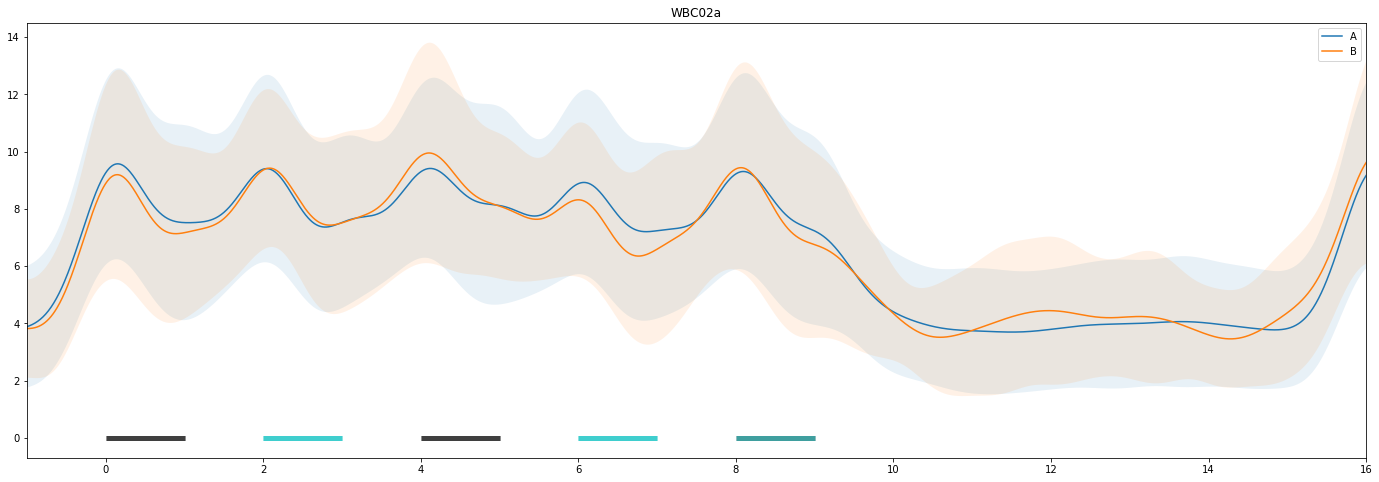

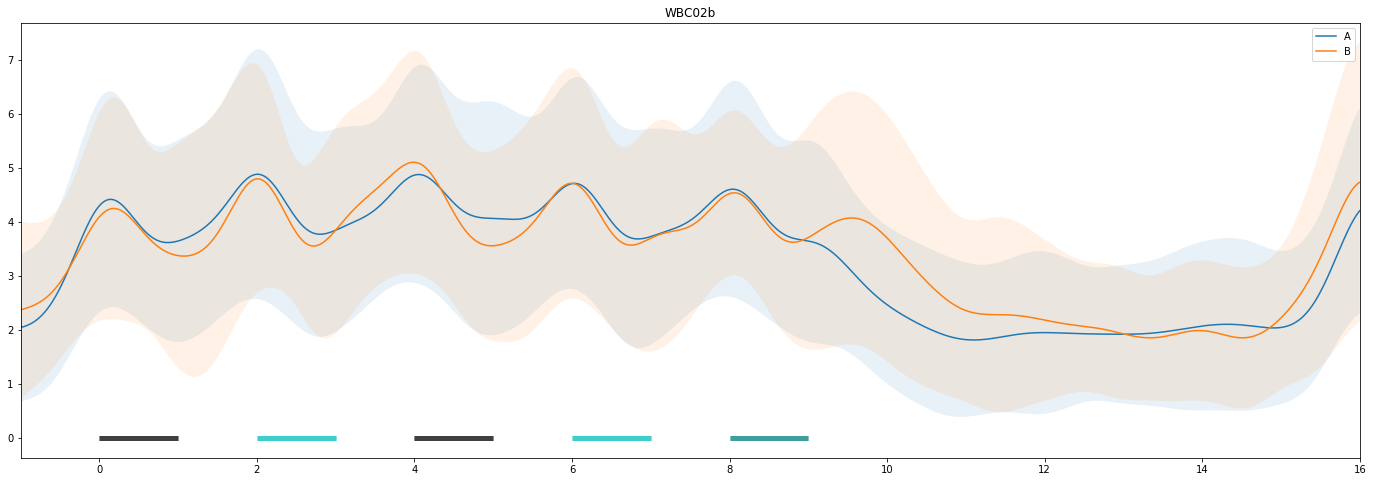

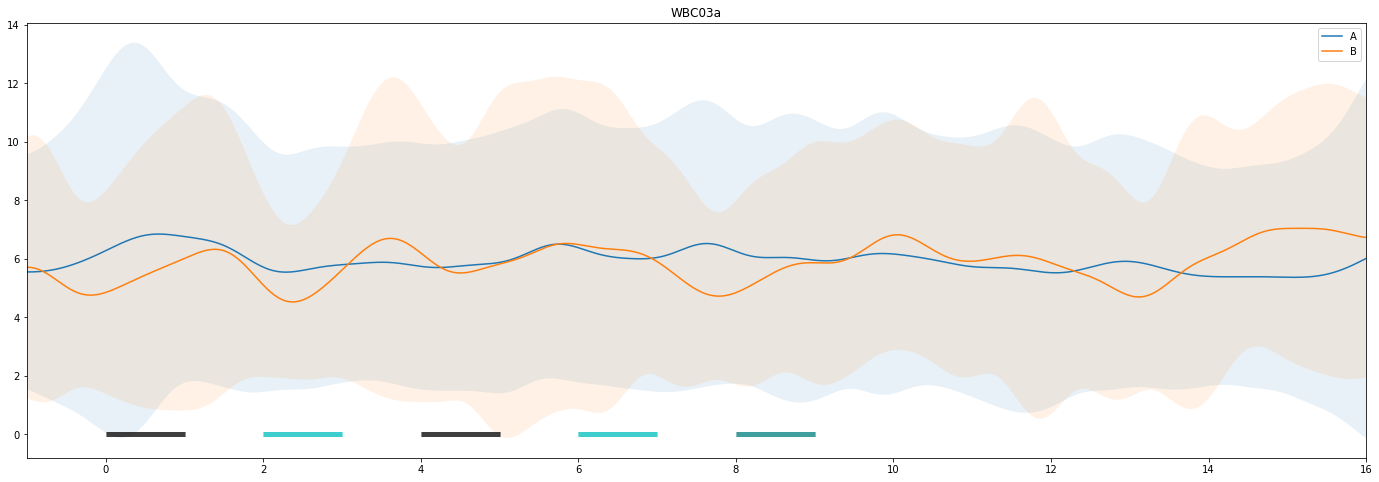

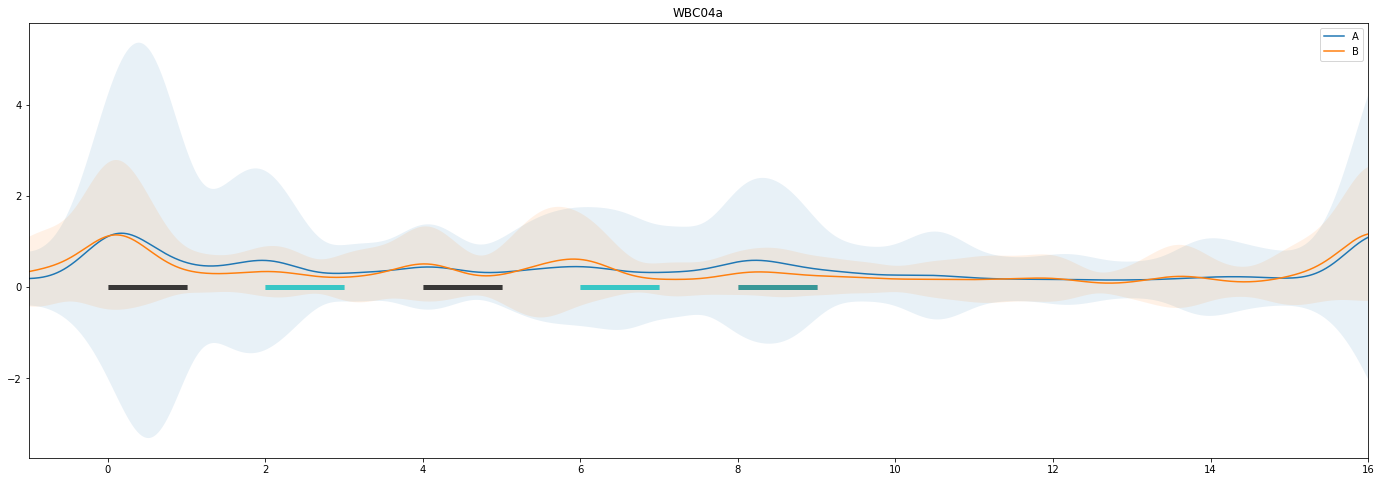

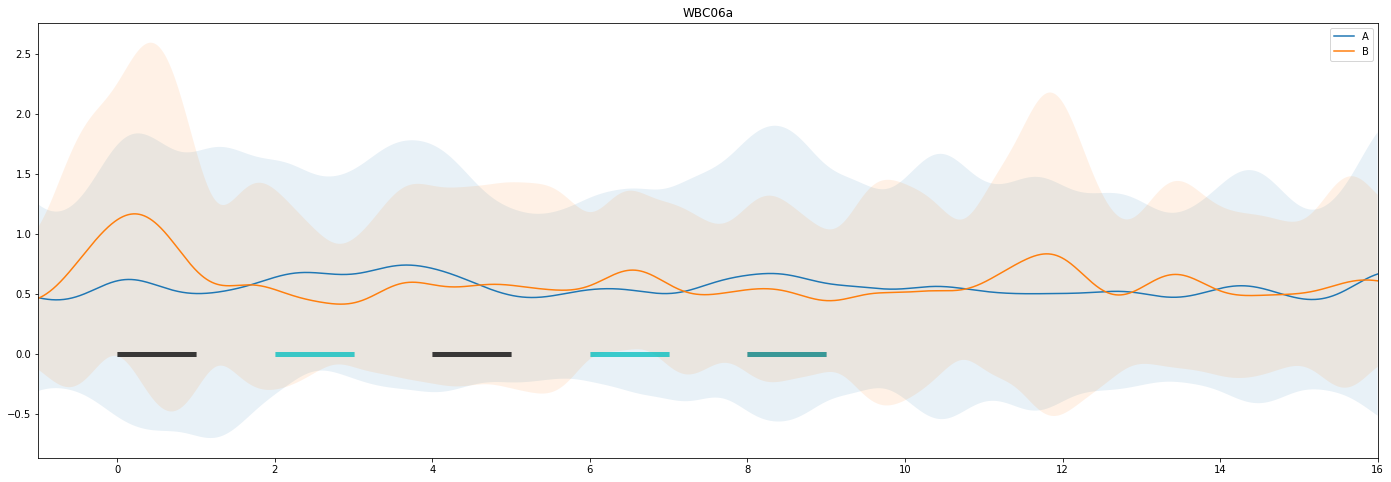

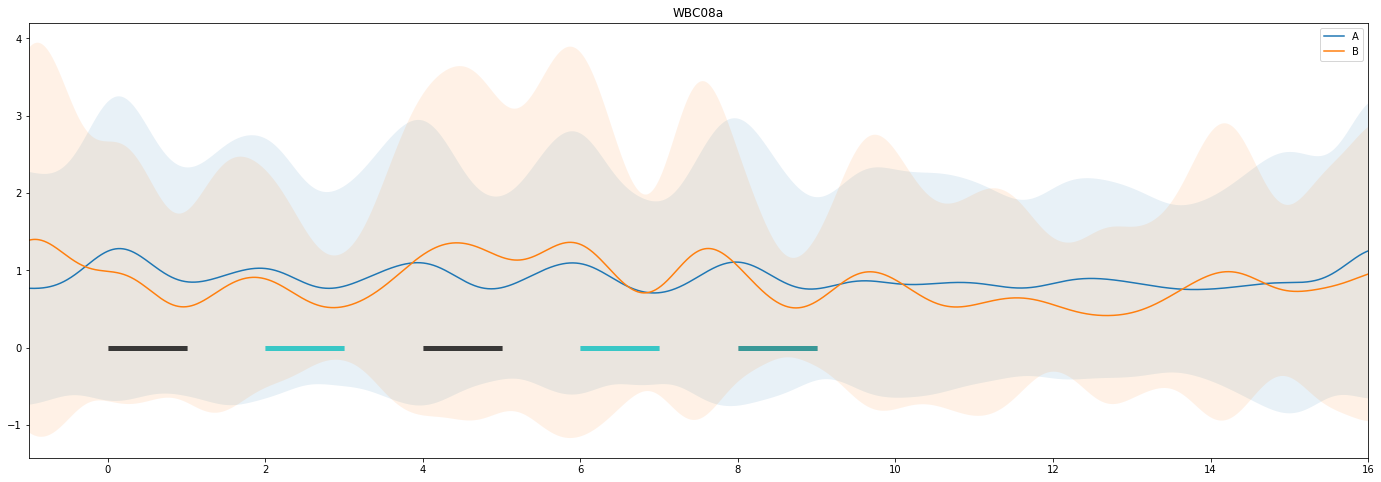

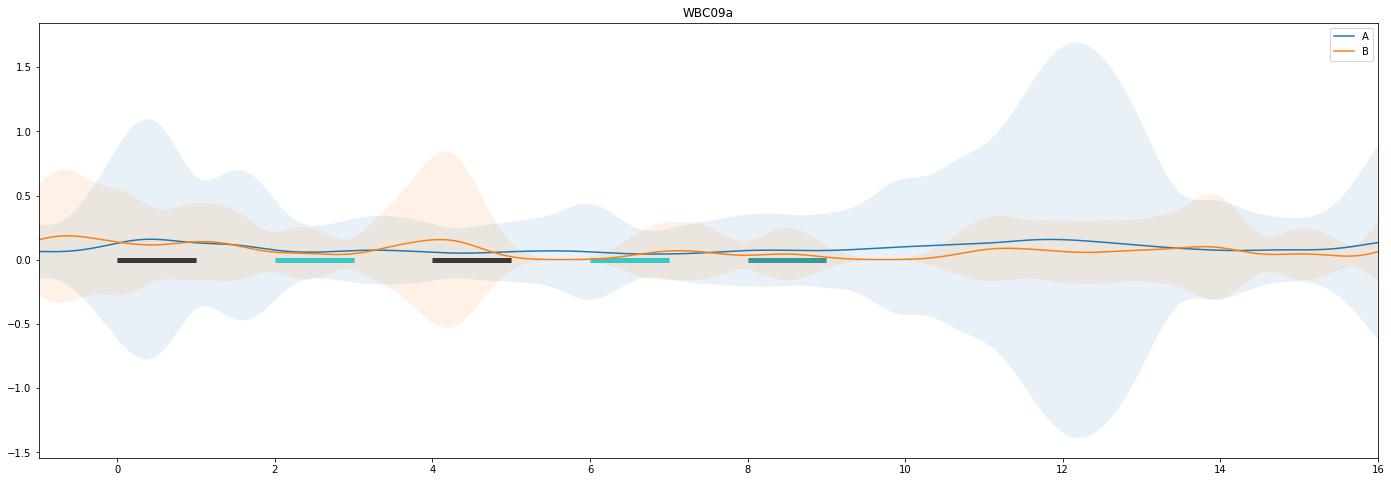

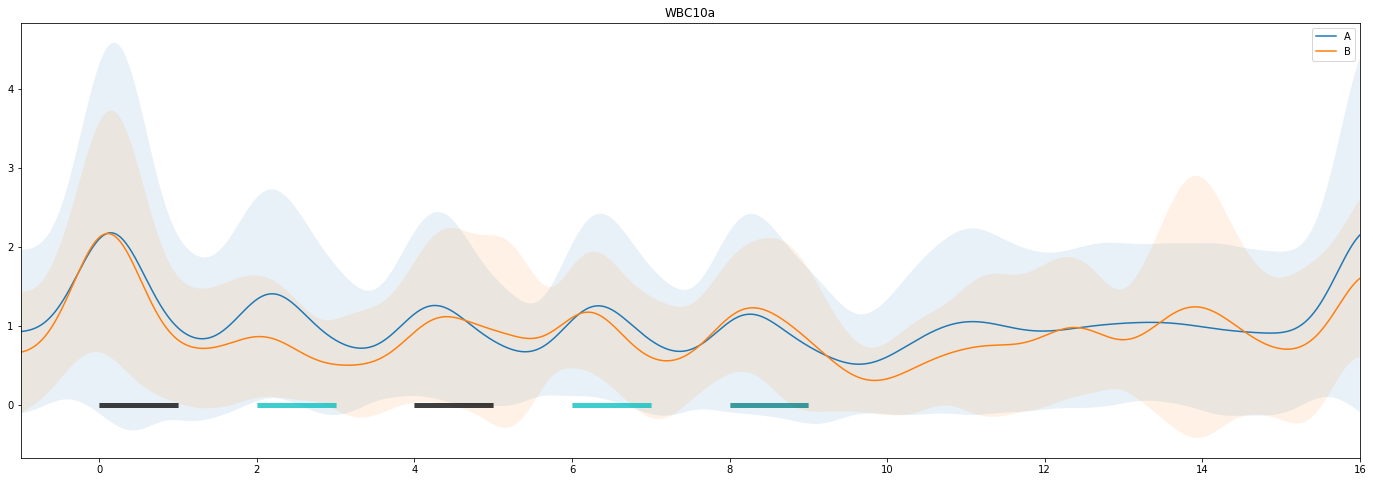

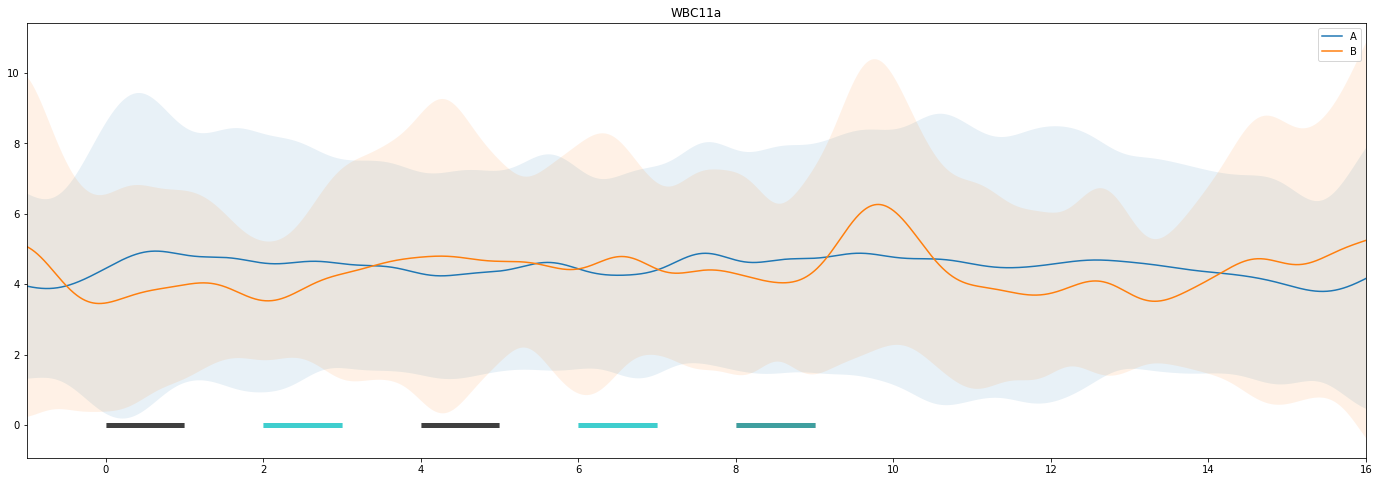

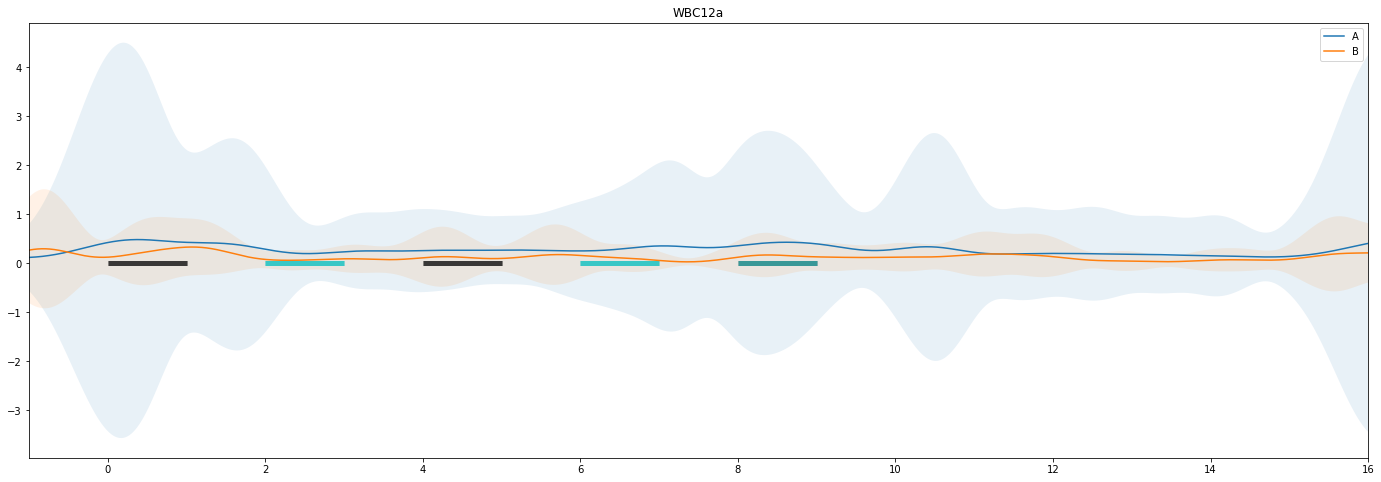

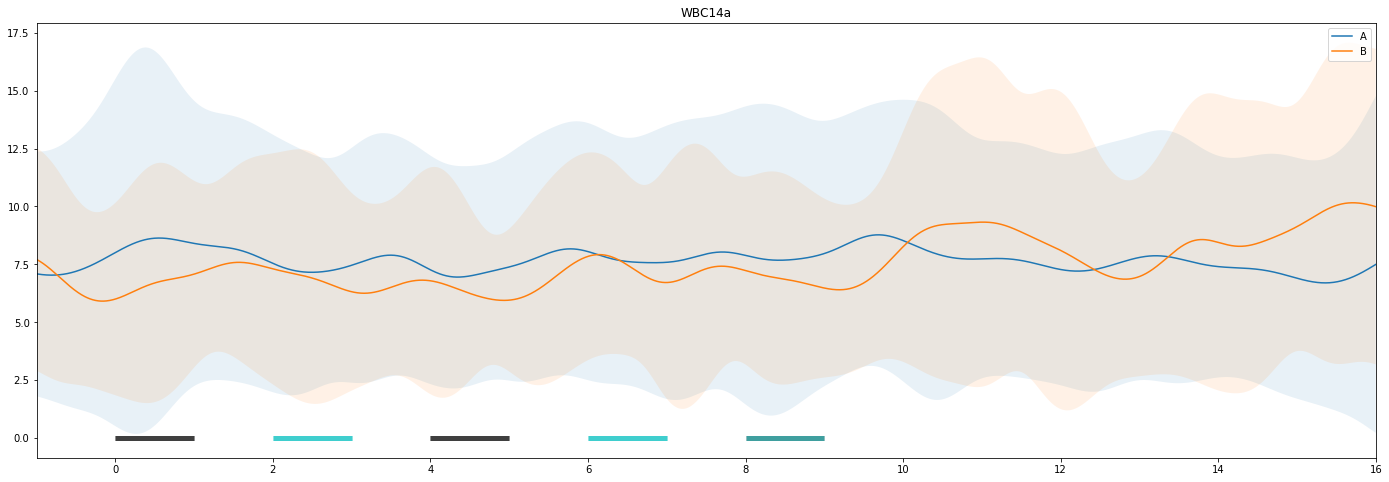

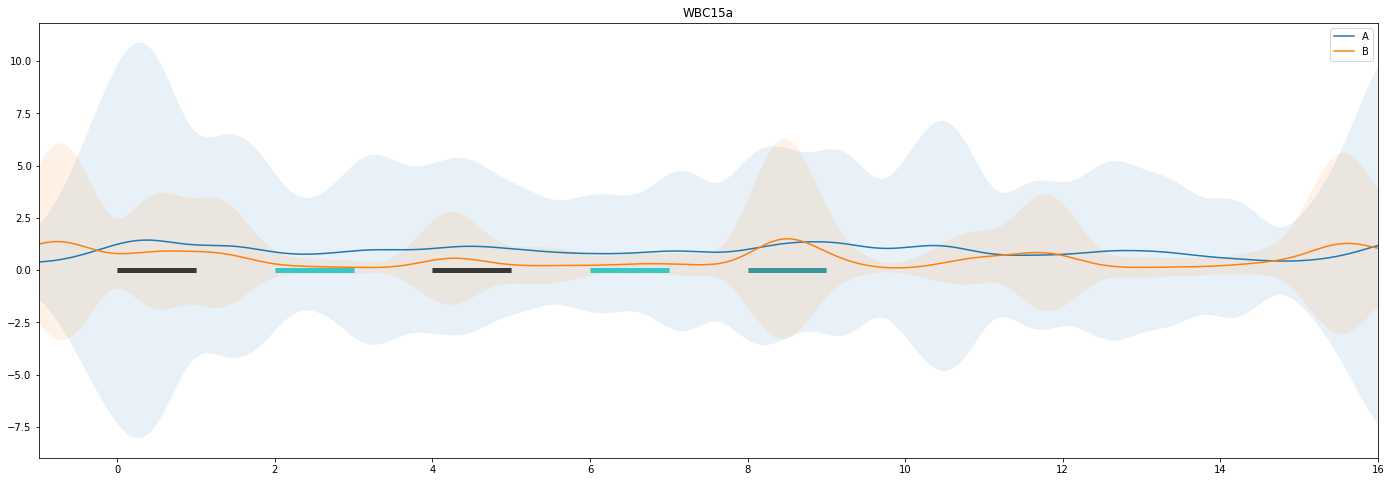

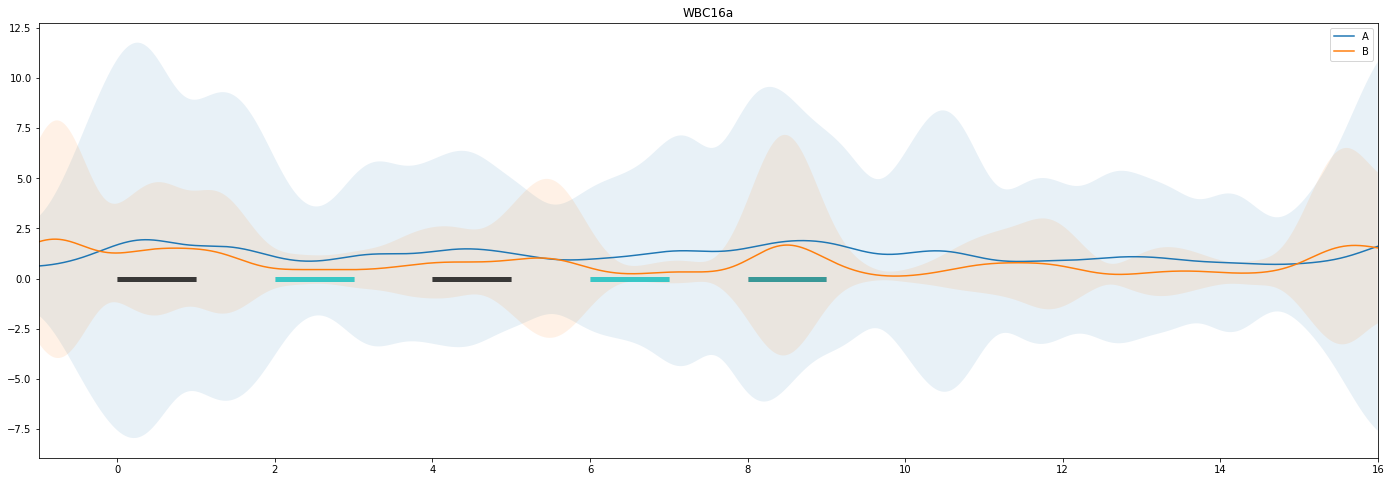

In [6]:
roi = (-1,16)
def ABABB_markers():
    plt.hlines(0, 0,1,linewidth=5,color='k', alpha=0.5)
    plt.hlines(0, 2,3,linewidth=5,color='c', alpha=0.5)
    plt.hlines(0, 4,5,linewidth=5,color='k', alpha=0.5)
    plt.hlines(0, 6,7,linewidth=5,color='c', alpha=0.5)
    plt.hlines(0, 8,9,linewidth=5,color='c', alpha=0.5)
    
def ABABA_markers():
    plt.hlines(0, 0,1,linewidth=5,color='k', alpha=0.5)
    plt.hlines(0, 2,3,linewidth=5,color='c', alpha=0.5)
    plt.hlines(0, 4,5,linewidth=5,color='k', alpha=0.5)
    plt.hlines(0, 6,7,linewidth=5,color='c', alpha=0.5)
    plt.hlines(0, 8,9,linewidth=5,color='k', alpha=0.5)


for channel in [i for i in ABABA_mean_result.keys() if i[0] != '_']:
    demo1 = ABABA_mean_result[channel]
    demo2 = ABABB_mean_result[channel]
    plt.figure(figsize=(24,8))
    spike.plot_curve_with_error_ribbon(demo1, roi, markers=ABABA_markers, label='A')
    plt.title(channel)
    spike.plot_curve_with_error_ribbon(demo2, roi, markers=ABABB_markers, label='B')
    plt.legend()
    plt.savefig(os.path.join(_dir, experiment_id+channel+".png"),bbox_inches='tight')
    # plt.show()